In [2]:
from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import time

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [3]:
# 读取数据
# path to where the data lies
dpath = '../data/'
train = pd.read_csv(dpath +"Otto_train.csv")
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
# 将类别字符串变成数字
# drop ids and get labels
y_train = train["target"]
y_train = y_train.map(lambda s: s[6:])
y_train = y_train.map(lambda s: int(s)-1)

train = train.drop(["id", "target"], axis=1)
X_train = np.array(train)
X_train

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  3, 10,  0],
       [ 0,  0,  0, ...,  0,  2,  0]])

In [5]:
# 将训练集合拆分成训练集和校验集，在校验集上找到最佳的模型超参数（PCA的维数）
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train,y_train, train_size = 0.8,random_state = 0)
X_train_part

/usr/local/python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 2, 12,  1, ...,  1,  0,  0],
       ...,
       [ 0,  0, 13, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [8]:
from sklearn.svm import LinearSVC

# 一个参数点（PCA维数为n）的模型训练和测试，得到该参数下模型在校验集上的预测性能
def n_component_analysis(n, X_train, y_train, X_val, y_val):
    start = time.time()
    pca = PCA(n_components=n)
    print("PCA begin with n_components: {}".format(n));
    pca.fit(X_train)
    # 在训练集和测试集降维 
    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)
    print("After PCA shape", X_train_pca.shape)
    # 利用SVC训练
    print('SVC begin')
    clf1 = LinearSVC()
    clf1.fit(X_train_pca, y_train)
    # 返回accuracy
    accuracy = clf1.score(X_val_pca, y_val)
    end = time.time()
    print("accuracy: {}, time elaps:{}".format(accuracy, int(end-start)))
    return accuracy

In [9]:
# 设置超参数（PCA维数）搜索范围
n_s = np.linspace(0.20, 0.9, num=10)
accuracy = []
for n in n_s:
    tmp = n_component_analysis(n, X_train_part, y_train_part, X_val, y_val)
    accuracy.append(tmp)

PCA begin with n_components: 0.2
After PCA shape (49502, 2)
SVC begin
accuracy: 0.4755171299288946, time elaps:31
PCA begin with n_components: 0.2777777777777778
After PCA shape (49502, 4)
SVC begin
accuracy: 0.5259372979961215, time elaps:51
PCA begin with n_components: 0.35555555555555557
After PCA shape (49502, 5)
SVC begin
accuracy: 0.5637524240465417, time elaps:57
PCA begin with n_components: 0.43333333333333335
After PCA shape (49502, 7)
SVC begin
accuracy: 0.6186974789915967, time elaps:375
PCA begin with n_components: 0.5111111111111111
After PCA shape (49502, 10)
SVC begin
accuracy: 0.6498060762766645, time elaps:67
PCA begin with n_components: 0.5888888888888889
After PCA shape (49502, 13)
SVC begin
accuracy: 0.6658047834518422, time elaps:84
PCA begin with n_components: 0.6666666666666667
After PCA shape (49502, 17)
SVC begin
accuracy: 0.6944893341952165, time elaps:94
PCA begin with n_components: 0.7444444444444445
After PCA shape (49502, 22)
SVC begin
accuracy: 0.70265029

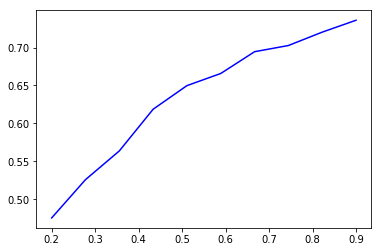

In [10]:
# 绘制不同PCA维数下模型的性能，找到最佳模型／参数（分数最高）
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_s, np.array(accuracy), 'b-')